<a href="https://colab.research.google.com/github/Bhavnicksm/dsp_lab_notebooks/blob/main/EE333_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LAB 2


In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Question 1
Write a function to perform lincon(h; x) to convolve two input sequences using the expression for liner convolution

In [2]:
def lincon_1(h,x):
  return np.convolve(h,x)

In [41]:
# handmade method to convolve two sequences
def lincon_2(h,x):
  x_ = np.pad(x, (len(h),len(h)))
  z = np.zeros(len(h)+len(x)-1)
  for t in range(len(z)):
    z[t] = (h*x_[t:len(h)+t]).sum()
  return z

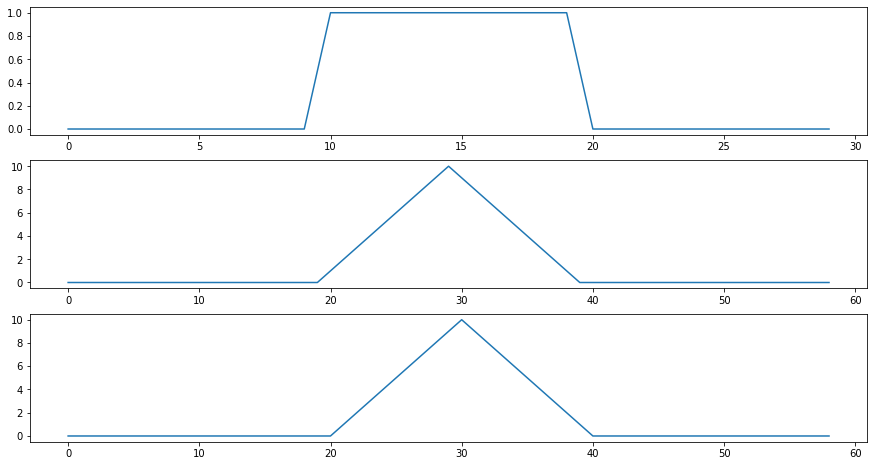

In [52]:
h = np.pad(np.ones(10),(10,10))
x = np.pad(np.ones(10),(10,10))

plt.figure(figsize=(15,8))
plt.subplot(311)
plt.plot(h)
plt.subplot(312)
plt.plot(lincon_1(h,x))
plt.subplot(313)
plt.plot(lincon_2(h,x))



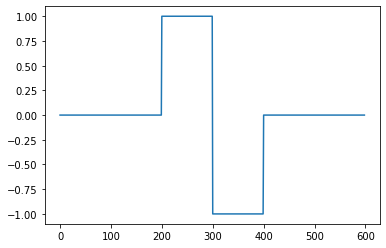

In [51]:
plt.plot(lincon_1(h,x) - lincon_2(h,x))

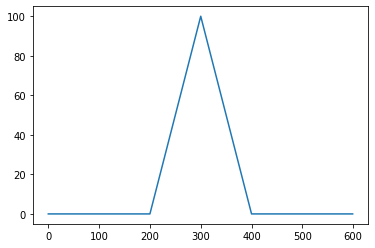

In [33]:
h = np.pad(np.ones(100),(100,100))
x = np.pad(np.ones(100),(100,100))

x_ = np.pad(x, (len(h),len(h)))
z = np.zeros(len(h)+len(x))
for t in range(len(x_)-len(h)):
  z[t] = (h*x_[t:len(h)+t]).sum() 

plt.plot(z)